In [1]:
from ENode import EGraph,ENode

ModuleNotFoundError: No module named 'ENode'

In [2]:
import onnx_graphsurgeon as gs
import onnx
import numpy as np

In [4]:
# graph = gs.import_onnx(onnx.load("/home/yssun/onnx/useful_func/torchfm/fm_1024_22_4_s.onnx"))
graph = gs.import_onnx(onnx.load("/home/yssun/onnx/enode/test_model/model_identity.onnx"))

In [7]:
graph.nodes[0]

onnx_graphsurgeon_node_2 (Add)
	Inputs: [
		Variable (input): (shape=[1024, 22], dtype=int64)
		Constant (onnx_graphsurgeon_constant_0): (shape=[1024, 22], dtype=int64)
	]
	Outputs: [
		Variable (add_out_gs_1): (shape=[1024, 22], dtype=int64)
	]

In [12]:
graph.nodes[0].inputs[1].values.shape[0]

1024

In [13]:
graph.nodes[0].inputs[0].shape[0]

1024

In [18]:
graph2 = gs.import_onnx(onnx.load("/home/yssun/onnx/enode/FM_1024_22_8_12_s.onnx"))
graph2.nodes[1]

/Slice (Slice)
	Inputs: [
		Variable (/Gather_output_0): (shape=[22], dtype=int64)
		Constant (/Constant_1_output_0): (shape=[1], dtype=int64)
		Constant (/Constant_3_output_0): (shape=[1], dtype=int64)
		Constant (/Constant_1_output_0): (shape=[1], dtype=int64)
		Constant (/Constant_4_output_0): (shape=[1], dtype=int64)
	]
	Outputs: [
		Variable (/Slice_output_0): (shape=[12], dtype=int64)
	]

In [14]:
model = gs.export_onnx(graph)
onnx.save(model, "FM_1024_22_8_12_s2.onnx")

In [11]:
graph.inputs[0].outputs

[/linear/Add (Add)
 	Inputs: [
 		Variable (input): (shape=[1024, 22], dtype=int64)
 		Constant (/linear/Constant_output_0): (shape=[22], dtype=int64)
 	]
 	Outputs: [
 		Variable (/linear/Add_output_0): (shape=[1024, 22], dtype=int64)
 	]]

In [4]:
test_EGraph = EGraph(graph)

In [5]:
d = test_EGraph.draw()

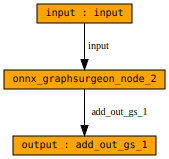

In [6]:
display(d)

In [7]:
input_desc = {'input':[slice(None,None),slice(0,12)]}

In [8]:
tuple(input_desc.values())

([slice(None, None, None), slice(0, 12, None)],)

In [9]:
test_EGraph.redundancyCal(input_desc)

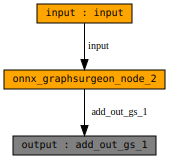

In [10]:
dd = test_EGraph.drawRedundancy()
display(dd)

In [7]:
test_EGraph.inputs['input'].node.shape

[1024, 22]

In [8]:
test_EGraph.Enodes['/Squeeze'].successor

{('/Squeeze_output_0', '/Sigmoid')}